```sh
dvc exp run --queue \
    -S dataset.path='musique' \
    -S qa.model='llama-3-70b-tgi' \
    -S qa.temperature='0.1,0.5,0.7,1.0' \
    -S qa.prompt='standard,cot-zs,cot-fs,cte' \
    -S run='1,2,3'
```

In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellem.dvc.experiment import load_experiments

experiments = load_experiments('ablation-temperature-full.json')
print(f"{len(experiments)} experiments")
experiments[0]

75 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/musique',
   'name': 'answerable',
   'split': 'validation'},
  'qa': {'prompt': 'standard', 'model': 'llama-3-70b-tgi', 'temperature': 0.7},
  'run': 1},
 'metrics': {'exact_match': 0.5, 'f1': 0.6599999999999999, 'fuzzy_match': 0.7}}

In [ ]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id", "name"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop_duplicates(subset=param_cols, inplace=True)

mask = (df["params.dataset.path"] == "bdsaglam/musique") & (df["params.dataset.split"] == "validation")
df = df.loc[mask].reset_index(drop=True)

df = df.sort_values(["params.qa.model", "params.qa.prompt", "params.qa.temperature", "params.run"])

df

,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match
41,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,1,0.371949,0.440146,0.416632
3,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,2,0.371121,0.438157,0.414977
1,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,3,0.364915,0.433579,0.407530
43,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.5,1,0.362019,0.429637,0.408357
2,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.5,2,0.377327,0.440525,0.422838
22,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.5,3,0.372362,0.439525,0.415391
37,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.7,1,0.364501,0.437996,0.415805
4,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.7,2,0.377327,0.443775,0.419942
20,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.7,3,0.373190,0.443116,0.414977
36,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,1.0,1,0.352917,0.421768,0.396359


In [6]:
df.drop(columns=["params.dataset.path", "params.dataset.name", "params.dataset.split", "params.qa.model"]).groupby(
    ["params.qa.prompt", "params.qa.temperature"]
).aggregate(["mean", "max", "count"]).loc[:, metric_cols]

metrics.exact_match                  \
                                                      mean       max count   
params.qa.prompt params.qa.temperature                                       
cot-fs           0.1                              0.369328  0.371949     3   
                 0.5                              0.370570  0.377327     3   
                 0.7                              0.371673  0.377327     3   
                 1.0                              0.362157  0.366984     3   
cot-zs           0.1                              0.361743  0.364501     3   
                 0.5                              0.362433  0.368225     3   
                 0.7                              0.354020  0.357882     3   
                 1.0                              0.344228  0.350021     3   
cte              0.1                              0.635912  0.638395     3   
                 0.5                              0.631499  0.632602     3   
                 0.7                              0.636326  0.639222     3   
                 1.0                              0.622121  0.622673     3   
standard         0.1                              0.543373  0.544063     3   
                 0.5                              0.537305  0.541167     3   
                 0.7                              0.524548  0.539098     3   
                 1.0                              0.525031  0.526272     3   

                                       metrics.f1                  \
                                             mean       max count   
params.qa.prompt params.qa.temperature                              
cot-fs           0.1                     0.437294  0.440146     3   
                 0.5                     0.436562  0.440525     3   
                 0.7                     0.441629  0.443775     3   
                 1.0                     0.430948  0.436727     3   
cot-zs           0.1                     0.435725  0.438870     3   
                 0.5                     0.435526  0.442912     3   
                 0.7                     0.428812  0.432154     3   
                 1.0                     0.415912  0.420435     3   
cte              0.1                     0.741665  0.743800     3   
                 0.5                     0.738394  0.739682     3   
                 0.7                     0.740226  0.742647     3   
                 1.0                     0.735057  0.736246     3   
standard         0.1                     0.651989  0.652452     3   
                 0.5                     0.649196  0.650146     3   
                 0.7                     0.653794  0.660000     3   
                 1.0                     0.641255  0.644234     3   

                                       metrics.fuzzy_match                  
                                                      mean       max count  
params.qa.prompt params.qa.temperature                                      
cot-fs           0.1                              0.413046  0.416632     3  
                 0.5                              0.415529  0.422838     3  
                 0.7                              0.416908  0.419942     3  
                 1.0                              0.405599  0.412909     3  
cot-zs           0.1                              0.405737  0.407944     3  
                 0.5                              0.405323  0.407944     3  
                 0.7                              0.397325  0.398842     3  
                 1.0                              0.386016  0.388498     3  
cte              0.1                              0.692456  0.694249     3  
                 0.5                              0.689008  0.689698     3  
                 0.7                              0.690663  0.692594     3  
                 1.0                              0.680320  0.681837     3  
standard         0.1                              0.607916  0.609847     3  
            

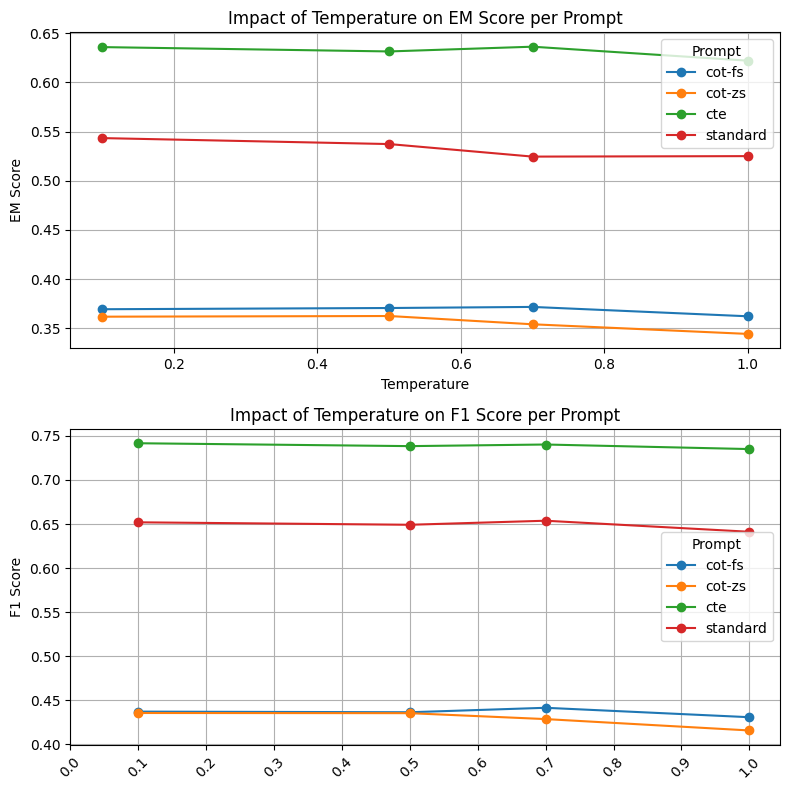

In [7]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(["params.qa.prompt", "params.qa.temperature"])[metric_cols].mean().reset_index()

# Plotting the impact of temperature per prompt for both F1 and EM scores
prompts = df_avg["params.qa.prompt"].unique()

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

for prompt in prompts:
    subset = df_avg[df_avg["params.qa.prompt"] == prompt]
    
    # Plot EM scores
    axs[0].plot(subset["params.qa.temperature"], subset["metrics.exact_match"], marker="o", label=prompt)
    
    # Plot F1 scores
    axs[1].plot(subset["params.qa.temperature"], subset["metrics.f1"], marker="o", label=prompt)
    

# Set labels and titles for F1 subplot
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("EM Score")
axs[0].set_title("Impact of Temperature on EM Score per Prompt")
axs[0].legend(title="Prompt", loc='best')
axs[0].grid(True)

# Set labels and titles for EM subplot
axs[1].set_ylabel("F1 Score")
axs[1].set_title("Impact of Temperature on F1 Score per Prompt")
axs[1].legend(title="Prompt", loc='best')
axs[1].grid(True)

# Set x-ticks for temperature values
plt.xticks(ticks=list(np.arange(0, 1.1, 0.1)), rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# To compare the prompts at the best temperature
# Assuming "best temperature" is defined as the one with the highest average F1 score
df_best_temp = (
    df_avg.loc[df_avg.groupby("params.qa.prompt")["metrics.f1"].idxmax()]
    .set_index("params.qa.prompt", drop=False)
    .loc[["standard", "cot-zs", "cot-fs", "cte"]]
    .copy()
)
df_best_temp

,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
params.qa.prompt,,,,,
standard,standard,0.7,0.524548,0.653794,0.634244
cot-zs,cot-zs,0.1,0.361743,0.435725,0.405737
cot-fs,cot-fs,0.7,0.371673,0.441629,0.416908
cte,cte,0.1,0.635912,0.741665,0.692456


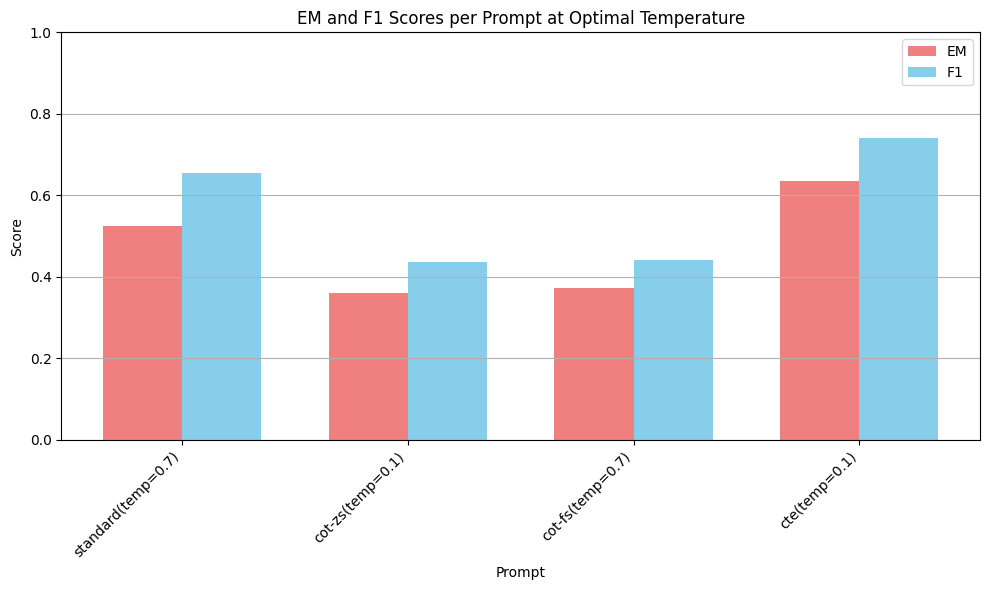

In [9]:
# Plotting EM and F1 scores together per prompt with temperature annotations
plt.figure(figsize=(10, 6))

# Create x-tick labels that include both the prompt and temperature
xs = [
    f"{prompt}(temp={temperature})"
    for prompt, temperature in zip(
        df_best_temp["params.qa.prompt"].values, df_best_temp["params.qa.temperature"].values
    )
]

# Set the width for the bars and the positions
bar_width = 0.35
index = np.arange(len(xs))

# Plot Exact Match (EM) bars
bar1 = plt.bar(index, df_best_temp["metrics.exact_match"], bar_width, label="EM", color="lightcoral")

# Plot F1 bars, shifted by bar_width for side-by-side bars
bar2 = plt.bar(index + bar_width, df_best_temp["metrics.f1"], bar_width, label="F1", color="skyblue")

# Add labels and titles
plt.xlabel('Prompt')
plt.ylabel('Score')
plt.title('EM and F1 Scores per Prompt at Optimal Temperature')

# Set x-ticks with prompt and temperature labels
plt.xticks(index + bar_width / 2, xs, rotation=45, ha='right')

# Add a legend to differentiate between EM and F1 scores
plt.legend()

# Add a grid and display the plot
plt.grid(axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

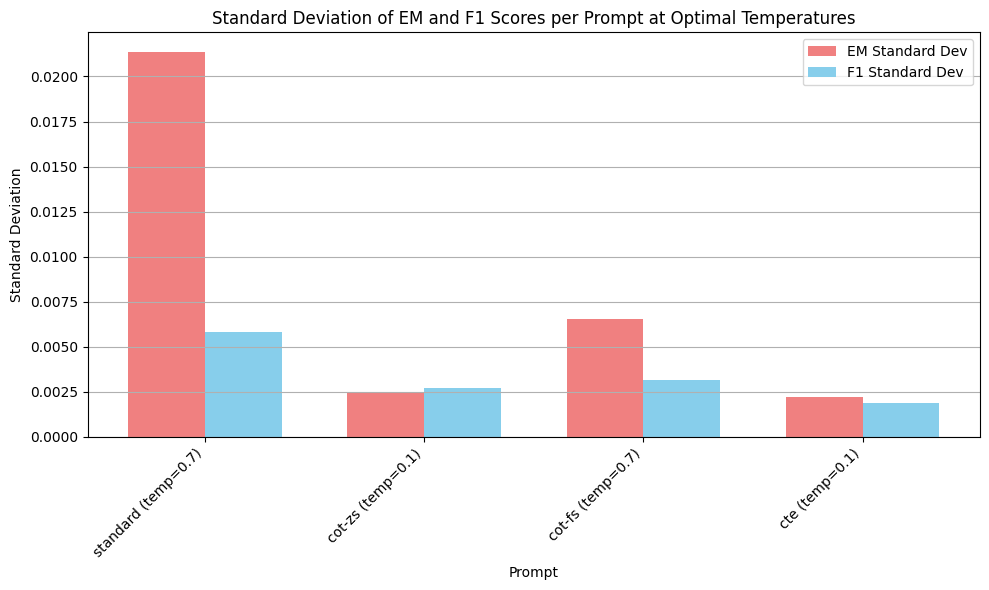

In [10]:
# Initialize an empty list to store stats
stats = []

# Loop through each prompt and its optimal temperature
for index, row in df_best_temp.iterrows():
    prompt = row['params.qa.prompt']
    optimal_temp = row['params.qa.temperature']
    
    # Select rows that correspond to the current prompt and its optimal temperature
    df_temp = df[(df['params.qa.prompt'] == prompt) & (df['params.qa.temperature'] == optimal_temp)]
    
    # Calculate stats for Exact Match and F1 scores
    em_std = df_temp['metrics.exact_match'].std()
    f1_std = df_temp['metrics.f1'].std()
    
    # Append to the list
    stats.append({
        'prompt': prompt,
        'optimal_temp': optimal_temp,
        'EM.std': em_std,
        'F1.std': f1_std
    })

# Convert the stats to a DataFrame
df_stats = pd.DataFrame(stats).set_index('prompt', drop=False).loc[['standard', 'cot-zs', 'cot-fs', 'cte']].copy()

# Combine prompt and optimal temperature for xticks
df_stats['prompt_with_temp'] = df_stats['prompt'] + " (temp=" + df_stats['optimal_temp'].astype(str) + ")"

# Plotting the stats of EM and F1 scores for each prompt
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for EM stats
bar_width = 0.35
index = np.arange(len(df_stats))

bar1 = ax.bar(index, df_stats['EM.std'], bar_width, label='EM Standard Dev', color='lightcoral')

# Bar plot for F1 stats, offset by bar_width for side-by-side bars
bar2 = ax.bar(index + bar_width, df_stats['F1.std'], bar_width, label='F1 Standard Dev', color='skyblue')

# Add labels and titles
ax.set_xlabel('Prompt')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of EM and F1 Scores per Prompt at Optimal Temperatures')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_stats['prompt_with_temp'], rotation=45, ha='right')
ax.legend()

# Add a grid and display the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()
